# Neural Network over Iris Dataset

## Import Libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

# Load the Iris Data Set

In [2]:
iris = datasets.load_iris()
X = iris.data
y= np.atleast_2d(iris.target).T
X.shape

(150, 4)

In [3]:
y_n = np.array(y).reshape(-1)
print(y_n)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
# Reshape output in array format
copy3=np.reshape(y, (150,))
print(copy3)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Define Parameters

In [5]:
# Learning Rate
eta = 0.01

# Number of epochs for learning
epochs = 2000

# Number of Hidden Neurons
hidden = 10

# Drop out rate probability (drp = 1 means no dropout)
drp = 0.5

# Define Functions

In [6]:
def sigmoid(x, derivative=False):
    if derivative:
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))

def softmax(x):
    # Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

    # return np.exp(x) / float(sum(np.exp(x)))

def softmax_d(y):
    #print("Input to Softmax Deriv function:", y)

    y_n = np.array(y).reshape(-1)
    #print("Transformed Input to Softmax Deriv function:", y_n)

    # initialize the 2-D jacobian matrix.
    jacobian_m = np.diag(y_n)
    print("Jacobian matrix created:",jacobian_m)
    
    for i in range(len(jacobian_m)):
        for j in range(len(jacobian_m)):
            if i == j:
                jacobian_m[i][j] = y_n[i] * (1-y_n[i])
            else: 
                jacobian_m[i][j] = -y_n[i]*y_n[j]
    return jacobian_m

In [7]:
def feedforward(X,mode,k=drp):
    # When training (mode="0") Drop out applies for the hidden layer outputs a_h
    if mode == 0:
        #print("Testing mode activated")
        z_h = np.dot(X, w01)
        a_h = sigmoid(z_h)
        #print("a_h before drop out:", a_h)
        r = np.random.binomial(size=a_h.shape,n=1,p=k)
        a_h *= r
        #print("a_h AFTER drop out, a_h:", a_h)
        #print("\n")
        z_o = np.dot(a_h, w12)
        #a_o = softmax(z_o)
        a_o = sigmoid(z_o)
    
    # When Testing (mode = "1") we use the normal weights w12 (not scaled with p)
    elif mode == 1:
        #print("Training mode activated")
        z_h = np.dot(X, w01)
        a_h = sigmoid(z_h)
        z_o = np.dot(a_h, w12)
        #a_o = softmax(z_o)
        a_o = sigmoid(z_o)
    else:
        print("Must specify 2nd argument '0' for Training or '1' for Test")
        
    return(a_o,a_h)

# Initialize the weights

In [8]:
w01 = np.random.random((len(X[0]), hidden))
w12 = np.random.random((hidden, 1))

# Start feeding forward and backpropagate *epochs* times.

In [9]:
error_total=[]
error_total0=[]
error_total1=[]
error_total2=[]

for epoch in range(epochs):
    a_o, a_h = feedforward(X,0,drp)
     # Calculate the error
    a_o_error = ((1 / 2) * (np.power((a_o - y), 2)))

    
    # Create vector with error and expected output
    a_o_err_y = np.concatenate((a_o_error,y), axis=1)
    
    # Create 3 masks with the same number of elements as 'a_o_err_y' as follows:
    # Mask 1 - TRUE when value equals Iris Output type "0", FALSE otherwise
    # Mask 2 - TRUE when value equals Iris Output type "1", FALSE otherwise
    # Mask 3 - TRUE when value equals Iris Output type "2", FALSE otherwise
    mask_type0 = a_o_err_y[:,1]==0
    mask_type1 = a_o_err_y[:,1]==1
    mask_type2 = a_o_err_y[:,1]==2

    # Capture respective type Errors 0, 1 and 2 by:
    # extracting TRUE elements through the application of masks to 'a_o_err_y' using the Error column "[:,0]"
    # The other column ([:,1]) is output y which was used for creating the masks in the first place
    a_o_err_y0 = a_o_err_y[mask_type0][:,0]
    a_o_err_y1 = a_o_err_y[mask_type1][:,0]
    a_o_err_y2 = a_o_err_y[mask_type2][:,0]
    
    # Extracting erros type 0, 1 and 2 in a more Elegant and compact way
    # a_o_err_y0 = a_o_err_y[a_o_err_y[:,1]==0][:,0]
    # a_o_err_y1 = a_o_err_y[a_o_err_y[:,1]==1][:,0]
    # a_o_err_y2 = a_o_err_y[a_o_err_y[:,1]==2][:,0]
        
    error_total = np.append(error_total,sum(a_o_error))
    error_total0 = np.append(error_total0,sum(a_o_err_y0))
    error_total1 = np.append(error_total1,sum(a_o_err_y1))
    error_total2 = np.append(error_total2,sum(a_o_err_y2))

    #print(sum(a_o_error))

    # Backpropagation
    ## Output to Hidden Layer weights
    delta_a_o_error = a_o - y
    delta_z_o = sigmoid(a_o,derivative=True)
    delta_w12 = a_h
    delta_output_layer = np.dot(delta_w12.T,(delta_a_o_error * delta_z_o))

    ## Hidden to Input Layer weights
    delta_a_h = np.dot(delta_a_o_error * delta_z_o, w12.T)
    delta_z_h = sigmoid(a_h,derivative=True)
    delta_w01 = X
    delta_hidden_layer = np.dot(delta_w01.T, delta_a_h * delta_z_h)

    # Adjust weights
    w01 = w01 - eta * delta_hidden_layer
    w12 = w12 - eta * delta_output_layer

In [10]:
s = np.array([[0.3], [0.7]])
x = np.array([[0],[1]])
    # initialize the 2-D jacobian matrix.
jacobian_m = np.diag(np.diag(s))

In [11]:
s.shape

(2, 1)

In [12]:
x.shape

(2, 1)

In [13]:
jacobian_m.shape

(1, 1)

In [14]:
# s.shape = (1, n) 
s = np.array([0.3, 0.7])
x = np.array([0, 1])
    # initialize the 2-D jacobian matrix.
jacobian_m = np.diag(s)

In [15]:
s.shape

(2,)

In [16]:
x.shape

(2,)

In [17]:
jacobian_m.shape

(2, 2)

# Show final total error, type contribution to error

In [18]:
print("Total error:",sum(a_o_error))
print("Type 0 error:",sum(a_o_err_y0))
print("Type 1 error:",sum(a_o_err_y1))
print("Type 2 error:",sum(a_o_err_y2))

Total error: [30.39823917]
Type 0 error: 1.8673522422272175
Type 1 error: 0.9189283386112216
Type 2 error: 27.611958587869903


# Plot error after each epoch

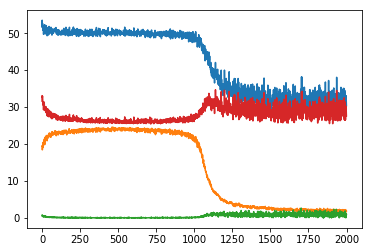

In [19]:
plt.plot(error_total)
plt.plot(error_total0)
plt.plot(error_total1)
plt.plot(error_total2)

# Show independent, dependent, predicted values

In [20]:
a_o, a_h = feedforward(X,1)
print(np.concatenate((X,y,a_o),axis=1))

[[5.1        3.5        1.4        0.2        0.         0.10160434]
 [4.9        3.         1.4        0.2        0.         0.10741228]
 [4.7        3.2        1.3        0.2        0.         0.10470939]
 [4.6        3.1        1.5        0.2        0.         0.11117739]
 [5.         3.6        1.4        0.2        0.         0.10139317]
 [5.4        3.9        1.7        0.4        0.         0.10159018]
 [4.6        3.4        1.4        0.3        0.         0.10554343]
 [5.         3.4        1.5        0.2        0.         0.10376153]
 [4.4        2.9        1.4        0.2        0.         0.11522118]
 [4.9        3.1        1.5        0.1        0.         0.1068982 ]
 [5.4        3.7        1.5        0.2        0.         0.10041967]
 [4.8        3.4        1.6        0.2        0.         0.10665301]
 [4.8        3.         1.4        0.1        0.         0.10714336]
 [4.3        3.         1.1        0.1        0.         0.10577263]
 [5.8        4.         1.2       